In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_24_WEEK_PROGRAM/master/S0.9%20--%20ML%20supervis%C3%A9%20-%20R%C3%A9duction%20de%20dimensions%2C%20Boosting%20%26%20Ensemble%20Learning/S9-B%20-%20Boosting%20%26%20Ensemble%20Learning/Boosting/Dataset/listings.csv?token=AGKBMYKJDNADFCZBVETHWCS7C3AR2')

In [3]:
dataset.price

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [4]:
dataset.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

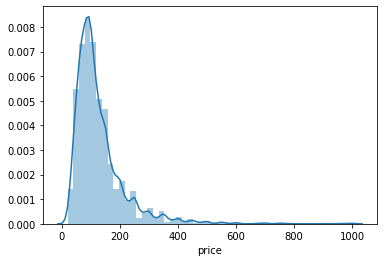

In [6]:
dataset.price = dataset.price.apply(lambda x: x[1:])
dataset.price = dataset.price.replace("1,000.00", "1000").astype(float)
sns.distplot(dataset.price)

In [7]:
dataset.price

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [8]:
avg_priced_dataset = dataset[dataset.price <= 400]
avg_priced_dataset.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.755000e+03,3.755000e+03,3.755000e+03,3753.000000,3753.000000,3755.000000,3755.000000,3755.000000,3739.000000,3749.000000,3754.000000,96.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3119.000000,3108.000000,3113.000000,3108.000000,3115.000000,3111.000000,3110.000000,0.0,3755.000000,3138.000000
mean,5.556910e+06,2.016010e+13,1.579411e+07,7.146283,7.146283,47.628887,-122.332935,3.272703,1.236026,1.270739,1.690730,836.437500,120.749933,1.639414,2.365113,780.472703,16.821305,36.885220,58.189880,244.672703,22.443675,94.517153,9.635135,9.552843,9.784106,9.807705,9.607522,9.452412,NaN,2.944607,2.096539
std,2.966011e+06,0.000000e+00,1.459490e+07,28.711382,28.711382,0.043270,0.031759,1.868531,0.556459,0.824873,1.056105,650.483429,68.744681,1.236517,16.441420,1696.449365,12.161880,23.306987,34.007566,126.911684,37.980257,6.597540,0.700417,0.801180,0.599360,0.571147,0.629853,0.749495,NaN,5.882812,1.827941
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.256584e+06,2.016010e+13,3.258368e+06,1.000000,1.000000,47.609078,-122.354154,2.000000,1.000000,1.000000,1.000000,415.000000,75.000000,1.000000,1.000000,60.000000,2.000000,13.500000,29.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.700000
50%,6.127974e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623451,-122.328750,2.000000,1.000000,1.000000,1.000000,750.000000,100.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.560000
75%,8.047928e+06,2.016010e+13,2.592334e+07,3.000000,3.000000,47.662976,-122.310698,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.020000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,10.000000,3000.000000,400.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


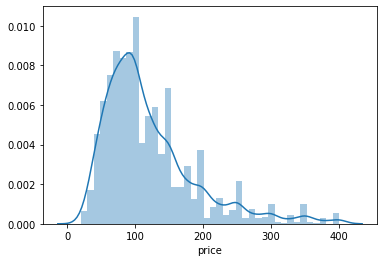

In [9]:
sns.distplot(avg_priced_dataset.price)

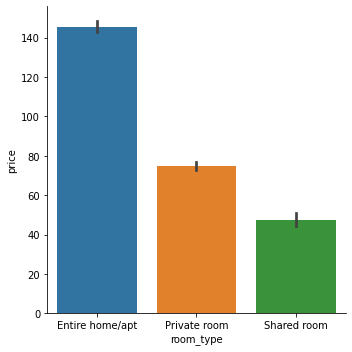

In [10]:
sns.catplot(x="room_type",y="price",data=avg_priced_dataset,kind="bar")

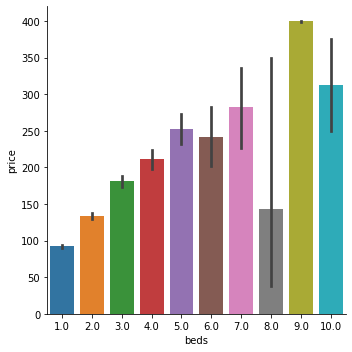

In [11]:
sns.catplot(x="beds",y="price",data=avg_priced_dataset,kind="bar")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


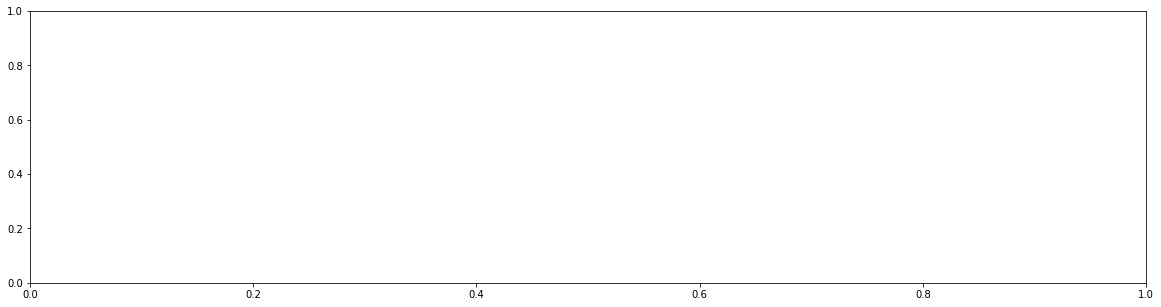

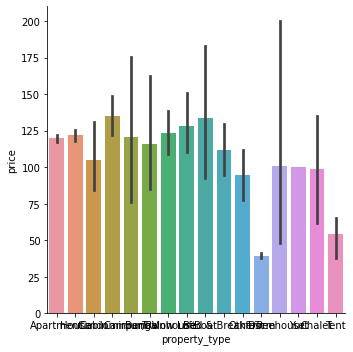

In [12]:
fig, ax = plt.subplots(figsize=(20,5))
sns.catplot(x="property_type", y="price", data=avg_priced_dataset, kind="bar", ax=ax)

In [13]:
X = avg_priced_dataset.iloc[:, avg_priced_dataset.columns != "price"]
y = avg_priced_dataset.iloc[:, avg_priced_dataset.columns == "price"]

In [14]:
a = X.isnull().sum() / X.shape[0] * 100
a.sort_values(ascending=False)

license             100.000000
square_feet          97.443409
monthly_price        60.053262
security_deposit     51.504660
weekly_price         47.270306
                       ...    
smart_location        0.000000
market                0.000000
state                 0.000000
city                  0.000000
id                    0.000000
Length: 91, dtype: float64

In [15]:
X_clean = X.drop(["host_since", 
            "host_location", 
            "host_about", 
            "host_thumbnail_url", 
            "host_picture_url",
           "license",
           "monthly_price",
           "square_feet",
            "host_verifications", 
        "street", 
        "neighbourhood", 
        "neighbourhood_cleansed", 
        "city", 
        "state", 
        "market", 
        "smart_location",
        "country_code",
        "country",
        "is_location_exact",
        "amenities",
        "jurisdiction_names",
        "first_review",
        "last_review",
        "calendar_last_scraped",
        "weekly_price",
            "notes",
                  "neighborhood_overview",
         "name",
                  "description",
                  "listing_url" ,
"host_id",
"host_url",
                 "scrape_id",
                 "space",
                 "picture_url",
                 "last_scraped",
                 "host_name",
                 "medium_url",
                 "summary",
                 "xl_picture_url",
                 "transit",
                 "thumbnail_url",
                 "host_neighbourhood",
                 "zipcode",
                 "calendar_updated",
                 "license","id"], axis=1)

In [16]:
X_clean.isnull().sum().sort_values(ascending=False)

security_deposit                    1934
cleaning_fee                        1022
host_acceptance_rate                 749
review_scores_checkin                647
review_scores_accuracy               647
review_scores_value                  645
review_scores_location               644
review_scores_cleanliness            642
review_scores_communication          640
review_scores_rating                 636
reviews_per_month                    617
host_response_rate                   511
host_response_time                   511
bathrooms                             16
bedrooms                               6
host_listings_count                    2
host_is_superhost                      2
host_total_listings_count              2
host_has_profile_pic                   2
host_identity_verified                 2
beds                                   1
property_type                          1
neighbourhood_group_cleansed           0
latitude                               0
longitude       

In [17]:
# Pour la suite, nous remplirons les valeurs NaN de la manière la plus simple possible 
X_clean.cleaning_fee = X_clean.cleaning_fee.apply(lambda x: float(x[1:])/100 if type(x) == str else x)
X_clean.cleaning_fee = X_clean.cleaning_fee.fillna(0)

In [18]:
# Pour la suite, nous remplirons les valeurs NaN de la manière la plus simple possible 
X_clean.cleaning_fee = X_clean.cleaning_fee.apply(lambda x: float(x[1:])/100 if type(x) == str else x)
X_clean.cleaning_fee = X_clean.cleaning_fee.fillna(0)

In [19]:
X_clean["host_acceptance_rate_clean"] = X_clean.host_acceptance_rate.apply(lambda x: int(x[:-1])/100 if type(x) == str else x)
X_clean = X_clean.drop("host_acceptance_rate", axis = 1)

In [20]:
X_clean.host_has_profile_pic = X_clean.host_has_profile_pic.fillna("f")
X_clean.host_identity_verified = X_clean.host_identity_verified.fillna("f")

X_clean.host_response_time = X_clean.host_response_time.fillna("Unknown")
X_clean.host_is_superhost = X_clean.host_is_superhost.fillna("Unknown")
X_clean.property_type = X_clean.property_type.fillna("unknown")

X_clean.extra_people = X_clean.extra_people.apply(lambda x: float(x[1:]))
X_clean.security_deposit = X_clean.security_deposit.apply(lambda x: float(str(x).replace(",","").replace("nan","$0")[1:]))
X_clean.security_deposit = X_clean.security_deposit.fillna(0)


In [21]:
y = y.apply(lambda x: float(x[1:]) if type(x)==str else x)

In [22]:
num_col = X_clean.select_dtypes(np.number).columns
cat_col = X_clean.select_dtypes("object").columns

X_num = X_clean[num_col]
X_cat =  pd.get_dummies(X_clean[cat_col],drop_first=True)


In [23]:
from sklearn.model_selection import train_test_split

X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_num, X_cat, y, test_size =0.2)

In [24]:
X_train_cat.shape

(3004, 95)

In [25]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

X_train_num_norm = pd.DataFrame(sc_x.fit_transform(X_train_num),columns=X_train_num.columns, index = X_train_num.index)
X_test_num_norm = pd.DataFrame(sc_x.transform(X_test_num),columns=X_test_num.columns, index = X_test_num.index)

X_train = pd.merge(X_train_num_norm, X_train_cat,left_index=True, right_index=True)
X_test = pd.merge(X_test_num_norm, X_test_cat,left_index=True, right_index=True)

In [26]:
!pip install missingpy
from missingpy import KNNImputer
imputer = KNNImputer()

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


     |████████████████████████████████| 51kB 1.9MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/missingpy/pairwise_external.py:135: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.6/dist-packages/missingpy/pairwise_external.py:138: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.6/dist-packages/missingpy/utils.py:1

In [27]:
from sklearn.ensemble import AdaBoostRegressor
regressor_ada = AdaBoostRegressor()

regressor_ada.fit(X_train, y_train)
regressor_ada.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3801874449990538

In [28]:
AdaBoostRegressor?

In [29]:
!pip install xgboost
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train,y_train)
regressor_xgb.score(X_test,y_test)

[11:51:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.6564175572040398

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
regressor_ada = AdaBoostRegressor(reg)
regressor_ada.fit(X_train, y_train)
regressor_ada.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-1380836294388.1638

In [31]:
regressor_ada.score(X_train, y_train)

0.20210776472922443

In [32]:
from sklearn.model_selection import GridSearchCV
regressor_ada = AdaBoostRegressor()
parameters = {'n_estimators':[40,50,70, 100, 150, 200],
              "learning_rate":[1.0, 0.9, 0.8, 0.7, 0.6, 0.5]}

regressor_ada_best = GridSearchCV(regressor_ada, parameters)
regressor_ada_best.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5],
                         'n_estimators': [40, 50, 70, 100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
regressor_ada_best.best_params_

{'learning_rate': 0.5, 'n_estimators': 40}

In [34]:
regressor_ada_best.best_estimator_.score(X_test,y_test)

0.47681374335367555

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
tree_regressor.score(X_test,y_test)

0.24956439641819797

In [40]:
from sklearn.ensemble import BaggingRegressor
bagging_reg = BaggingRegressor(n_estimators=40)
bagging_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=40,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [41]:
bagging_reg.score(X_test,y_test)

0.6179211397873818

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gdb_reg = GradientBoostingRegressor(learning_rate=0.5,n_estimators=40)
gdb_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
gdb_reg.score(X_test,y_test)

0.6254550578318285

In [46]:
from sklearn.externals import joblib 
joblib.dump(gdb_reg, 'test.joblib') 

['test.joblib']

In [47]:
loaded_model = joblib.load('test.joblib')
result = loaded_model.score(X_test,y_test)
print(result)

0.6254550578318285
